# In this Notebook:
- We define global setting for plotting with Seaborn with a custom color palette
containing the colors to be same as our presentation layout
- Plot feature importance of our best model

## Import Libraries and Dependencies

In [13]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


## Global Plot Settings (sns)

In [14]:
# set seaborn options globally
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
custom_palette = sns.set_palette(sns.color_palette(colors))
custom_params = {"axes.facecolor": "#f2f1ec", 
"figure.facecolor": "#f2f1ec",
'figure.titleweight': 'bold',
'figure.titlesize': 28,#'large',
'grid.alpha': 1.0,
'font.size': 16.0,
'font.weight': 'bold',
'axes.labelsize': 16,
'axes.labelcolor': '#365b6d',
'axes.titlepad': 10.0,
'axes.titlesize': 'large',
'xtick.labelsize': 16,
'xtick.color': '#365b6d',
'xtick.bottom': True,
'ytick.labelsize': 16,
'ytick.color': '#365b6d',
'ytick.left': True,
'text.color' : '#365b6d',
'legend.title_fontsize': 12.0,
'legend.frameon': False,
'axes.linewidth': 3,#0.8,
'axes.spines.left': True,
'axes.spines.bottom': True,
'axes.spines.right': True,
'axes.spines.top': True,
'axes.edgecolor': '#365b6d',
'axes.labelweight': 'bold',
'axes.titleweight': 'bold',
}
sns.set_theme(style="white", palette=colors, rc=custom_params)

# custom color palette (color codes taken from our Canva presentation layout): 
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
custom_palette = sns.set_palette(sns.color_palette(colors))
#365b6d - dark blue
#41c1ba - turquoise
#289dd2 - medium blue
#6c9286 - muddy green
#fa9939 - orange 
#f2f1ec - off-white

# display color palette
sns.color_palette()

[(0.21176470588235294, 0.3568627450980392, 0.42745098039215684),
 (0.2549019607843137, 0.7568627450980392, 0.7294117647058823),
 (0.1568627450980392, 0.615686274509804, 0.8235294117647058),
 (0.4235294117647059, 0.5725490196078431, 0.5254901960784314),
 (0.9490196078431372, 0.9450980392156862, 0.9254901960784314),
 (0.9803921568627451, 0.6, 0.2235294117647059)]

## Read in Data

In [15]:
df_eda = pd.read_csv('../data/petfinder-adoption-prediction/df_eda.csv')


## Feature Importance of Best Model (Gradient Boost Classifier, see NB 03)

### Best-Model Feature Importance

In [16]:
# creating a df with feature importance of entire data set

text = """
type	0.049147
gender	0.025749
sterilized	0.080004
breed_type	0.058305
vaccinated_dewormed	0.044452
fee_bin	0.017456
maturitysize_0	0.026198
maturitysize_1	0.025918
maturitysize_2	0.011453
maturitysize_3	0.005277
furlength_0	0.024012
furlength_1	0.012539
furlength_2	0.030665
health_0	0.012811
health_1	0.010218
health_2	0.004993
color_pattern_0	0.012414
color_pattern_1	0.014602
color_pattern_2	0.011517
photoamt_11	0.153354
age_bin	0.187544
description_char 0.181373
"""

# Create a DataFrame from the text
data = []
lines = text.strip().split('\n')
for line in lines[0:]:
    feature, value = line.split()
    value = round(float(value), 2)
    data.append((feature, float(value)))

df_fi = pd.DataFrame(data, columns=['features', 'values']).sort_values('values', ascending=False).reset_index(drop=True)

# Print the DataFrame
print(df_fi)

               features  values
0               age_bin    0.19
1      description_char    0.18
2           photoamt_11    0.15
3            sterilized    0.08
4            breed_type    0.06
5                  type    0.05
6   vaccinated_dewormed    0.04
7        maturitysize_0    0.03
8        maturitysize_1    0.03
9                gender    0.03
10          furlength_2    0.03
11          furlength_0    0.02
12              fee_bin    0.02
13       maturitysize_2    0.01
14       maturitysize_3    0.01
15             health_0    0.01
16             health_1    0.01
17      color_pattern_0    0.01
18      color_pattern_1    0.01
19      color_pattern_2    0.01
20          furlength_1    0.01
21             health_2    0.00


In [17]:
# sort by feature, rest index to sum values for each dummy into one original feature:
df_fi.head(22).sort_values('features').reset_index(drop=True)

,features,values
0,age_bin,0.19
1,breed_type,0.06
2,color_pattern_0,0.01
3,color_pattern_1,0.01
4,color_pattern_2,0.01
5,description_char,0.18
6,fee_bin,0.02
7,furlength_0,0.02
8,furlength_1,0.01
9,furlength_2,0.03


In [18]:
# sum furlength dummies

sum_furlength = df_fi.loc[7:9, 'values'].sum()
furlength_row = {'features': 'furlength', 'values': sum_furlength}
df_fi = pd.concat([df_fi, pd.DataFrame([furlength_row])], ignore_index=True).sort_values('features').reset_index(drop=True)

# sum maturitysize dummies

sum_matsize = df_fi.loc[15:18, 'values'].sum()
matsize_row = {'features': 'maturitysize', 'values': sum_matsize}
df_fi = pd.concat([df_fi, pd.DataFrame([matsize_row])], ignore_index=True).sort_values('features').reset_index(drop=True)

# sum colorpattern dummies

sum_color = df_fi.loc[2:4, 'values'].sum()
color_row = {'features': 'color_pattern', 'values': sum_color}
df_fi = pd.concat([df_fi, pd.DataFrame([color_row])], ignore_index=True).sort_values('features').reset_index(drop=True)

# sum health dummies

sum_health = df_fi.loc[13:15, 'values'].sum()
health_row = {'features': 'health', 'values': sum_health}
df_fi = pd.concat([df_fi, pd.DataFrame([health_row])], ignore_index=True).sort_values('features').reset_index(drop=True)

# drop dummy rows
indices_to_drop = list(range(3, 6)) + list(range(9, 12)) + list(range(14, 17)) + list(range(18, 22))
df_fi_dummy = df_fi.drop(indices_to_drop).sort_values('values', ascending=False).reset_index(drop=True)

# display feature importance list
df_fi_dummy.head(22)

,features,values
0,age_bin,0.19
1,description_char,0.18
2,photoamt_11,0.15
3,furlength,0.09
4,sterilized,0.08
5,maturitysize,0.08
6,breed_type,0.06
7,type,0.05
8,vaccinated_dewormed,0.04
9,color_pattern,0.03


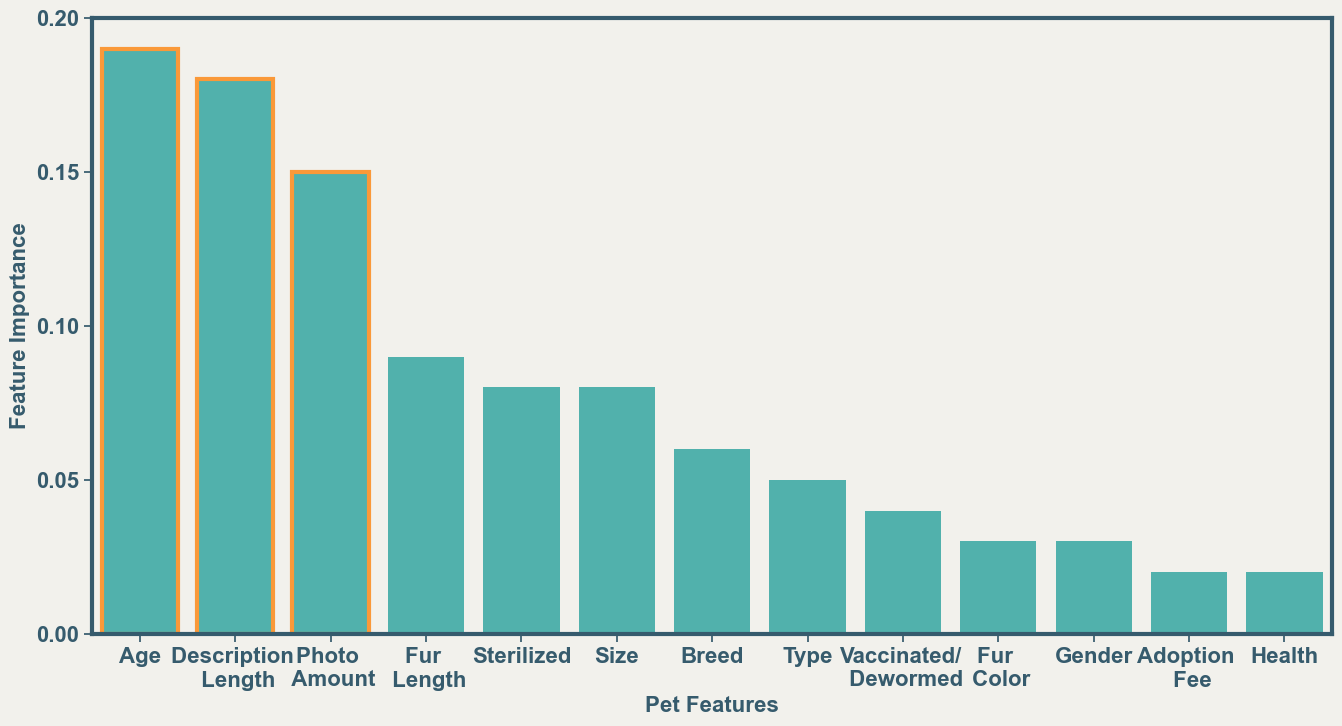

In [19]:
# plot best model feature importance with sums of dummies, unicolored bars, three most important features with orange margins

fig = plt.figure(figsize=(16, 8))
#x_tick_colors = ['#365b6d'] * 3 + ['#C5C6D0'] * (len(df_fi_dummy)-3)

fi_dummy_plot = sns.barplot(data=df_fi_dummy, x='features', y='values', linewidth=3, color='#41c1ba')

plt.xlabel("Pet Features")
plt.ylabel("Feature Importance")

custom_x_ticks = (np.arange(0,13)) 
custom_x_tick_labels = ['Age', 'Description \n Length','Photo \n Amount', 'Fur \n Length', 'Sterilized', 'Size', 'Breed','Type', 'Vaccinated/ \n Dewormed', 'Fur \n Color', 'Gender', 'Adoption \n Fee', 'Health']
plt.xticks(custom_x_ticks, custom_x_tick_labels, )

custom_y_ticks = (np.linspace(0, 0.2, 5))
plt.yticks(custom_y_ticks)

for i, bar in enumerate(fi_dummy_plot.patches):
    if i < 3:
        bar.set_edgecolor('#fa9939')
    else:
        bar.set_edgecolor('none')

plt.savefig('../images/feat_importance.jpg', dpi=1200)
plt.show();